## Final Project Submission

* Student name: Solphine Joseph, Grace Rotich, Mathew Kiprotich, Hilary Simiyu, Clyde Ochieng
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL

# Time Series Modeling Project

## a)Business Understanding 

#### *Overview:*

The real estate market presents a dynamic and complex investment landscape, where the value of investments can significantly impact the financial well-being of investors. Identifying lucrative investment opportunities requires analyzing vast amounts of historical data to predict future trends, with the inherent volatility and regional diversity of the real estate market. Investors seek to maximize returns while managing the risks associated with market fluctuations and regional economic changes.The primary stakeholder in this project is Prime Nest Investment real-estate company which is  focused on identifying  the top 5 zip codes for real estate investment and optimizing their portflolios permomance by selecting regions with the highest potential for growth and stability.


#### *Problem Statement:*

The core challenge faced by PrimeNest Investments is the difficulty in accurately forecasting real estate prices across various zip codes, taking into account factors like profit margins, risk and investment horizons. The firm needs to navigate through the ambiguity and complexity of the real estate market to identify zip codes that promise the best returns on investment, balanced with an acceptable level of risk.
By leveraging historical real estate price data from Zillow Research and employing time series modeling, PrimeNest Investments seeks a comprehensive analysis and recommendation to facilitate informed decision-making and strategic expansion of their investment portfolio.


#### *Challenges:*

- *Historical Data Only*: The dataset does not include future or real-time data, limiting the analysis to historical trends and necessitating assumptions about future market behavior.
- *Lack of External Factors*: External economic indicators such as interest rates, employment rates and GDP growth which can significantly influence real estate prices are not included. This absence might limit the comprehensiveness of the forecast.
- *Missing Values*: Any missing data could affect the analysis's accuracy.


#### *Objectives*

- To provide a data-driven basis for investment decisions with a model having accuracy of 80%.
- To identify zip codes with the highest potential for appreciation, thereby maximizing ROI.
- To offer insights into market trends, enabling stakeholders to manage risks better and align investments with long-term financial goals.

PrimeNest Investments will use the project's findings to focus their investment portfolio on zip codes with the best potential. Market analysts, financial advisors, and individual investors can leverage these insights for making informed real estate decisions. Beyond identifying investment opportunities, the project enhances understanding of real estate market dynamics and equips stakeholders with actionable insights to navigate investment complexities, thereby supporting their financial goals.

#### *Conclusion:*

PrimeNest Investments will use the project's findings to focus their investment portfolio on zip codes with the best potential. Market analysts, financial advisors, and individual investors can leverage these insights for making informed real estate decisions. Beyond identifying investment opportunities, the project enhances understanding of real estate market dynamics and equips stakeholders with actionable insights to navigate investment complexities, thereby supporting their financial goals.


## b) Data Understanding 

*Data Source and Suitability:*

The dataset is sourced from Zillow Research('https://www.zillow.com/research/data'), a reputable provider of historical real estate market data. It encompasses historical home values across various zip codes in the United States, spanning from April 1996 to April 2018. This dataset is particularly suited for the project due to its comprehensive coverage of the real estate market over two decades, offering a rich foundation for analyzing trends, forecasting future real estate prices, and identifying promising investment opportunities.

*Dataset Properties:*

- *Size of the Dataset*: The dataset consists of 14,723 entries (rows) and 272 columns. Each entry represents a unique zip code.
The column names are as follows:

| Field Name | Description |
|---|---|
| RegionID | A unique identifier for each region or zip code. |
| RegionName | The name of the region, which typically corresponds to the zip code. |
| City | The city where the region is located. |
| State | The state where the region is located. |
| Metro | The metropolitan area that the region is part of. |
| CountyName | The county where the region is located. |
| SizeRank | A ranking of the region based on its size or importance, with 1 being the largest or most significant. |
| Date | The date of the recorded real estate price |
| Price | The real estate price recorded for that region and date. |




In [2]:
# importing relevant libraries

# Analysis libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

#import the classes from the functions module
from functions import Data_Loader, Data_Informer, DataCleaner, DataPreparer, TimeSeriesAnalyzer , Modeling, Evaluation


Create an Instance of the classes to be used

In [3]:
loader = Data_Loader()

informer = Data_Informer()

modeler = Modeling()

evaluator = Evaluation()


In [4]:
#Store the File Path
path = 'zillow_data.csv'

#Load the Dataset
zillow_data = loader.load_data(path)

informer.print_info(zillow_data)
zillow_data.head()


Shape of the dataset:
(14723, 272)

Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB
None

Columns and their data types:
RegionID: int64
RegionName: int64
City: object
State: object
Metro: object
CountyName: object
SizeRank: int64
1996-04: float64
1996-05: float64
1996-06: float64
1996-07: float64
1996-08: float64
1996-09: float64
1996-10: float64
1996-11: float64
1996-12: float64
1997-01: float64
1997-02: float64
1997-03: float64
1997-04: float64
1997-05: float64
1997-06: float64
1997-07: float64
1997-08: float64
1997-09: float64
1997-10: float64
1997-11: float64
1997-12: float64
1998-01: float64
1998-02: float64
1998-03: float64
1998-04: float64
1998-05: float64
1998-06: float64
1998-07: float64
1998-08: float64
1998-09: float64
1998-10: float64
1998-11: float64
1998-12: float64
1999-01: float64
1999-02: float64
1999-03

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


This dataset has a mix of various datatypes: RegionID, RegionName, and SizeRank as integers (int64) to facilitate mathematical computations, City, State, Metro, CountyName as objects to accommodate text-based categories, and Prices as float64 to enable precise numerical analysis and forecasting and the actual Time Series values are stored as separate columns as float64

## c) Data Preparation

This code initialize the datacleaner class with zillow dataset and its essential for preparing and cleaning the dataset for analysis

In [5]:
#Cleaning Zillow dataset with DataCleaner Class 

cleaner = DataCleaner(zillow_data)

In [6]:
# Data Preparation with DataPreparer Class
preparer = DataPreparer(zillow_data)

* Reshaping the dataset from a wide format to a long format, creating time and value columns.
* Data Type Conversion - time column was converted from a string to date-time data type.
* Dropping the null values in the Value column by row.

In [7]:
# Use the preparer object to melt the data
clean_data = preparer.melt_data()
# Display the first few rows of the melted data
clean_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [8]:
# Finding the Number of Unique Values in Each Column
clean_data.nunique()

RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
CountyName     1212
SizeRank      14723
time            265
value         24372
dtype: int64

High uniqueness in columns like RegionID, RegionName and SizeRank indicates a well-differentiated dataset, columns like City and CountyName having fewer unique values than RegionID suggest that multiple regions can belong to the same city or county, which is typical in geographic datasets.

In [9]:
# Initialize the DataPreparer with cleaned data
datach = DataPreparer(clean_data)

In [10]:
# Missing values percentage
datach.missing_values_percentage()

,Total,Percent
Metro,236023,6.302848
value,0,0.000000
time,0,0.000000
SizeRank,0,0.000000
CountyName,0,0.000000
State,0,0.000000
City,0,0.000000
RegionName,0,0.000000
RegionID,0,0.000000


In [11]:
# Check for outliers in 'value' column
datach.check_outliers('value')

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,1996-04-01,766000.0
21,61703,10128,New York,NY,New York,New York,22,1996-04-01,3676700.0
84,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,1996-04-01,480200.0
321,91706,77057,Houston,TX,Houston,Harris,322,1996-04-01,448800.0
...,...,...,...,...,...,...,...,...,...
3901575,94323,83821,Coolin,ID,Sandpoint,Bonner,14704,2018-04-01,540400.0
3901576,70763,29915,Bluffton,SC,Hilton Head Island,Beaufort,14705,2018-04-01,507500.0
3901578,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,2018-04-01,796600.0
3901583,95893,89413,Glenbrook,NV,Gardnerville Ranchos,Douglas,14712,2018-04-01,2161900.0


In [12]:
# check null values
datach.check_null_values()

RegionID           0
RegionName         0
City               0
State              0
Metro         236023
CountyName         0
SizeRank           0
time               0
value              0
dtype: int64

## Data Cleaning

The Metro column has a significant number of missing values, accounting for approximately 6.30% of the total data. This indicates that information regarding metropolitan areas is incomplete for some entries.

In [13]:
#Dropping the metro column
clean_data = clean_data.drop(['Metro'], axis=1)

In [14]:
#checking the first few rows
clean_data.head()

,RegionID,RegionName,City,State,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,5,1996-04-01,77300.0


In [15]:
# Initialize the DataCleaner with cleaned data
cleaner = DataCleaner(clean_data)


Detect Outliers Identifying data points that are significantly different from others.
Treat Outliers: Deciding whether to remove, correct or keep outliers based on the context of the analysis.

## EXPLORATORY DATA ANALYSIS

EDA in time series analysis involves ploting of the house prices values against the time which is the index inorder to see patterns. Exploring for trends either upwards, downwards, stationary or cyclic trends. 
Seasonality is also checked since it affects the choice of modelling. Both yearly and quarterly deacde will be considered.
unexpected trends will also be factored in.


The time column datatype is date-time - setting the time column as an index.

In [16]:
clean_data.dtypes

RegionID               int64
RegionName             int64
City                  object
State                 object
CountyName            object
SizeRank               int64
time          datetime64[ns]
value                float64
dtype: object

In [17]:
clean_data_indexed = clean_data.set_index("time")

Checking for the time period of the entire dataset

In [18]:
clean_data_indexed

,RegionID,RegionName,City,State,CountyName,SizeRank,value
time,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,5,77300.0
...,...,...,...,...,...,...,...
2018-04-01,58333,1338,Ashfield,MA,Franklin,14719,209300.0
2018-04-01,59107,3293,Woodstock,NH,Grafton,14720,225800.0
2018-04-01,75672,40404,Berea,KY,Madison,14721,133400.0


Checking the limits of the value column

In [19]:
clean_data_indexed['value'].describe()

count    3.744704e+06
mean     2.076064e+05
std      2.400207e+05
min      1.130000e+04
25%      9.790000e+04
50%      1.476000e+05
75%      2.372000e+05
max      1.931490e+07
Name: value, dtype: float64

Creating an object instance of the class TimeSeriesAnalyzer called analyzer.

In [20]:
analyzer = TimeSeriesAnalyzer(clean_data_indexed, value_column='value')

Ploting the overall time series from 1996 to 2018 shows an upward trend over the years, with very little fluctuations seen.

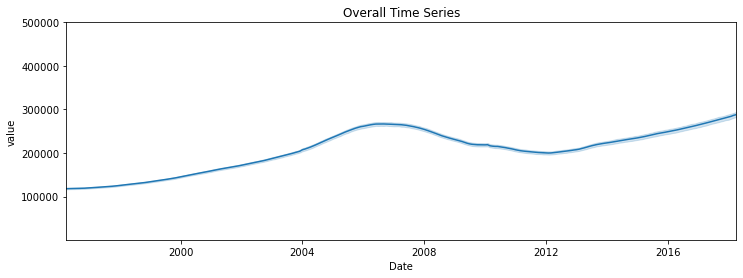

In [29]:
# 1. Plot overall graph
analyzer.plot_overall(xlim=('1996-04-01', '2018-04-01'), ylim=(900, 500000), title='Overall Time Series')


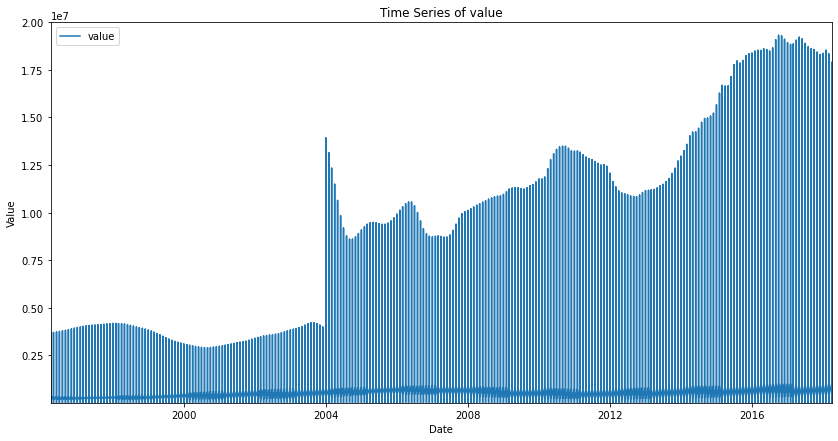

In [25]:

analyzer.plot_series(xlim=('1996-04-01', '2018-04-01'), ylim=(9000, 20000000), title='Overall Time Series')

In [23]:
clean_data_indexed

,RegionID,RegionName,City,State,CountyName,SizeRank,value
time,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,5,77300.0
...,...,...,...,...,...,...,...
2018-04-01,58333,1338,Ashfield,MA,Franklin,14719,209300.0
2018-04-01,59107,3293,Woodstock,NH,Grafton,14720,225800.0
2018-04-01,75672,40404,Berea,KY,Madison,14721,133400.0
